In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

In [2]:
# loading csv file
names=['sample', 'thickness', 'size', 'shape', 'adhesion', 'epithelial', 'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'status']
df = pd.read_csv('../datasets/breast-cancer-wisconsin.data', names=names, na_values='?')
print(df.isnull().sum())
df.head(15)

sample         0
thickness      0
size           0
shape          0
adhesion       0
epithelial     0
nuclei        16
chromatin      0
nucleoli       0
mitoses        0
status         0
dtype: int64


,sample,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses,status
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [3]:
df['status'].value_counts()

2    458
4    241
Name: status, dtype: int64

In [4]:
y = df['status']
X = df.drop(columns=['status', 'sample'])
# 'status' goes for labels and number of 'sample' isn't important

print(X.dtypes)
X.head(15)

thickness       int64
size            int64
shape           int64
adhesion        int64
epithelial      int64
nuclei        float64
chromatin       int64
nucleoli        int64
mitoses         int64
dtype: object


,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
5,8,10,10,8,7,10.0,9,7,1
6,1,1,1,1,2,10.0,3,1,1
7,2,1,2,1,2,1.0,3,1,1
8,2,1,1,1,2,1.0,1,1,5
9,4,2,1,1,2,1.0,2,1,1


In [5]:
# cleaning
X.fillna(X.mean(), inplace=True)
# changing NaN values for mean values
print(X.isna().sum())

thickness     0
size          0
shape         0
adhesion      0
epithelial    0
nuclei        0
chromatin     0
nucleoli      0
mitoses       0
dtype: int64


In [6]:
# making correction of types
X['nuclei'] = X['nuclei'].astype('int64')
print(X.dtypes)
X.head(10)

thickness     int64
size          int64
shape         int64
adhesion      int64
epithelial    int64
nuclei        int64
chromatin     int64
nucleoli      int64
mitoses       int64
dtype: object


,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,8,7,10,9,7,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,5
9,4,2,1,1,2,1,2,1,1


In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from imblearn.over_sampling import BorderlineSMOTE

In [8]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

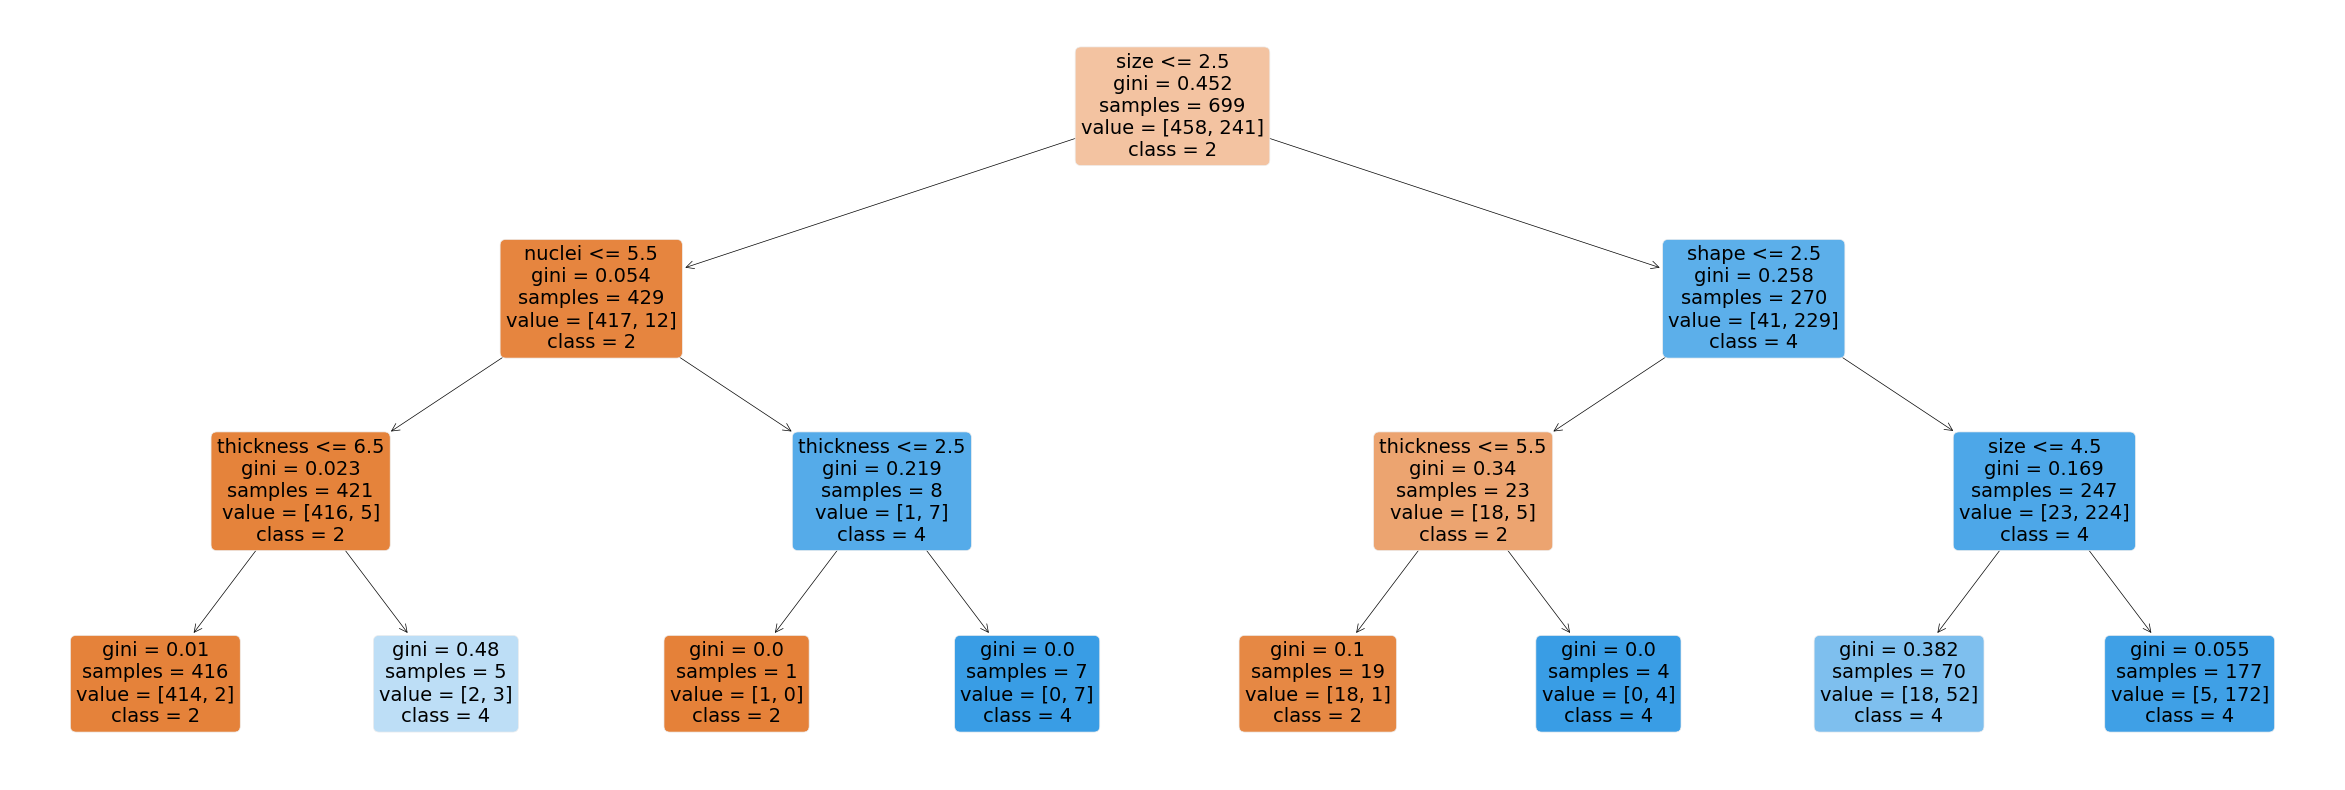

In [9]:
names.remove('status'); names.remove('sample')
plt.figure(figsize=(30,10))
plot_tree = plot_tree(tree_clf, feature_names=names, 
                      class_names=[ str(i) for i in y.unique().tolist() ], 
                      rounded=True, filled=True, fontsize=14)
plt.show()

In [10]:
tree_rules = export_text(tree_clf, feature_names=names)
print(tree_rules)

|--- size <= 2.50
|   |--- nuclei <= 5.50
|   |   |--- thickness <= 6.50
|   |   |   |--- class: 2
|   |   |--- thickness >  6.50
|   |   |   |--- class: 4
|   |--- nuclei >  5.50
|   |   |--- thickness <= 2.50
|   |   |   |--- class: 2
|   |   |--- thickness >  2.50
|   |   |   |--- class: 4
|--- size >  2.50
|   |--- shape <= 2.50
|   |   |--- thickness <= 5.50
|   |   |   |--- class: 2
|   |   |--- thickness >  5.50
|   |   |   |--- class: 4
|   |--- shape >  2.50
|   |   |--- size <= 4.50
|   |   |   |--- class: 4
|   |   |--- size >  4.50
|   |   |   |--- class: 4



In [11]:
oversample = BorderlineSMOTE(sampling_strategy=0.7)
X, y = oversample.fit_resample(X, y)
y.value_counts()

2    458
4    320
Name: status, dtype: int64

In [12]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(123)

In [13]:
# preprocessing
preprocesser = MinMaxScaler()
X = preprocesser.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [15]:
# decomposition
pca = PCA()
# classifier
knn = KNeighborsClassifier()

In [16]:
# pipeline
pipeline = Pipeline(steps=[('pca', pca), ('knn', knn)])

n_components = np.arange(2, 6)
n_neighbors  = np.arange(2, 9)
weights      = ['uniform', 'distance']

parameters = dict(pca__n_components=n_components, 
                  knn__n_neighbors =n_neighbors,
                  knn__weights     =weights)

In [17]:
# searching for best model and fitting
model = GridSearchCV(pipeline, parameters, cv=7)
model.fit(X_train, y_train)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([2, 3, 4, 5, 6, 7, 8]),
                         'knn__weights': ['uniform', 'distance'],
                         'pca__n_components': array([2, 3, 4, 5])})

In [18]:
print('Best number of PCA components:', model.best_estimator_.get_params()['pca__n_components'])
print('Best number of knn neighbors:', model.best_estimator_.get_params()['knn__n_neighbors'])
print('Best knn weights:', model.best_estimator_.get_params()['knn__weights'])
print('Best scores:', f'Accuracy: {100 * model.best_score_ :.4f}%')

Best number of PCA components: 5
Best number of knn neighbors: 4
Best knn weights: uniform
Best scores: Accuracy: 96.9781%


In [19]:
def plottingFun(model, X, y):
    fig = plt.figure()
    ax  = fig.add_subplot(111)
    
    padding    = 0.1
    resolution = 0.1
    
    # !!! (2 for benign, 4 for malignant)
    colors = {2:'royalblue', 4:'lightsalmon'}
    
    
    # calculate boundaries
    X_min, X_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    X_range = X_max - X_min
    y_range = y_max - y_min
    X_min  -= X_range * padding
    y_min  -= y_range * padding
    X_max  += X_range * padding
    y_max  += y_range * padding
    
    
    xx, yy = np.meshgrid(np.arange(X_min, X_max, resolution), np.arange(y_min, y_max, resolution))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.seismic)
    plt.axis('tight')
    
    
    for label in np.unique(y):
        indices = np.where(y==label)
        plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], alpha=0.7, label='{}'.format('benign' if label==2 else 'malignant'))
        
    plt.title('K = ' + str(model.get_params()['n_neighbors']))
    plt.xlabel('pca_1')
    plt.ylabel('pca_2')
    plt.legend(loc='best')
    plt.show()

In [20]:
pca_plot = PCA(n_components=2) # 2D
X_plot = pca_plot.fit_transform(X_train)

knn_plot = KNeighborsClassifier(n_neighbors = model.best_estimator_.get_params()['knn__n_neighbors'], 
                           weights     = model.best_estimator_.get_params()['knn__weights'])
knn_plot.fit(X_plot, y_train)

KNeighborsClassifier(n_neighbors=4)

<IPython.core.display.Javascript object>


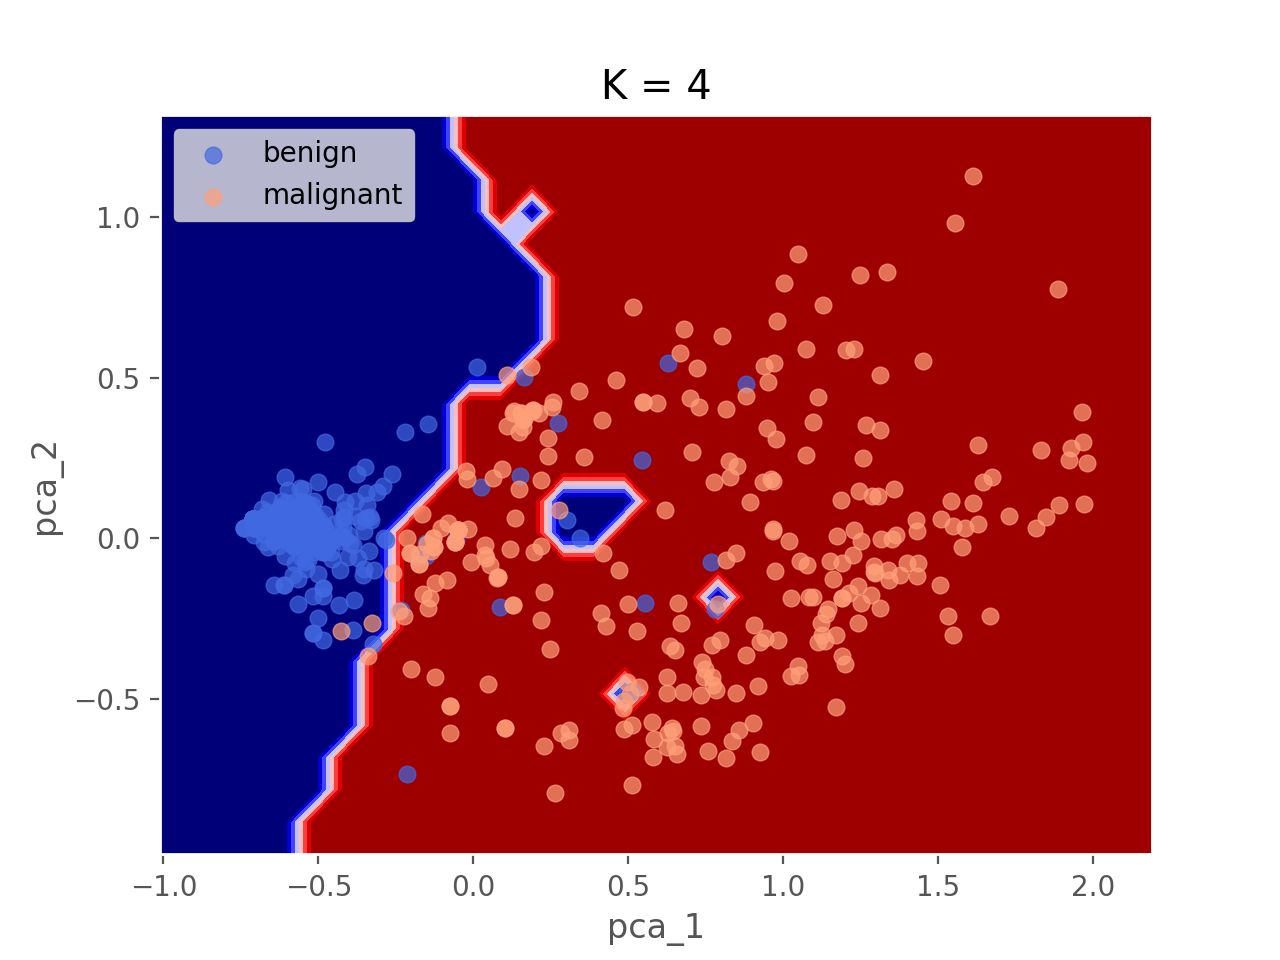

In [21]:
# plotting the samples and algorithm results
%matplotlib notebook
plottingFun(knn_plot, X_plot, y_train)

In [22]:
y_pred = model.predict(X_test)

In [23]:
def get_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / y_true.shape[0]

In [24]:
accuracy = get_accuracy(y_test, y_pred)
print( f'Accuracy: {100 * accuracy :.4f}%' )

Accuracy: 99.1453%


In [25]:
import seaborn as sn
from sklearn import metrics

In [26]:
pca_components = model.best_estimator_.get_params()['pca'].components_
print(pca_components)

[[ 0.29285614  0.40255168  0.38901042  0.34136967  0.25911068  0.43167772
   0.29054319  0.35905345  0.13231154]
 [-0.19347581  0.20980651  0.12205707  0.08978149  0.26862401 -0.79925539
   0.01869145  0.39490829  0.16828468]
 [-0.66546013  0.01479603 -0.0641958   0.67112546  0.06849416  0.11583251
   0.06297526 -0.28341467  0.00387703]
 [ 0.49115815  0.19060592  0.10959262  0.22691957  0.21990694 -0.291371
  -0.08818792 -0.71521367  0.07978842]
 [-0.43013239  0.32554135  0.32002322 -0.6022772   0.3300654   0.15007819
   0.0852645  -0.31039621  0.09366851]]


<IPython.core.display.Javascript object>


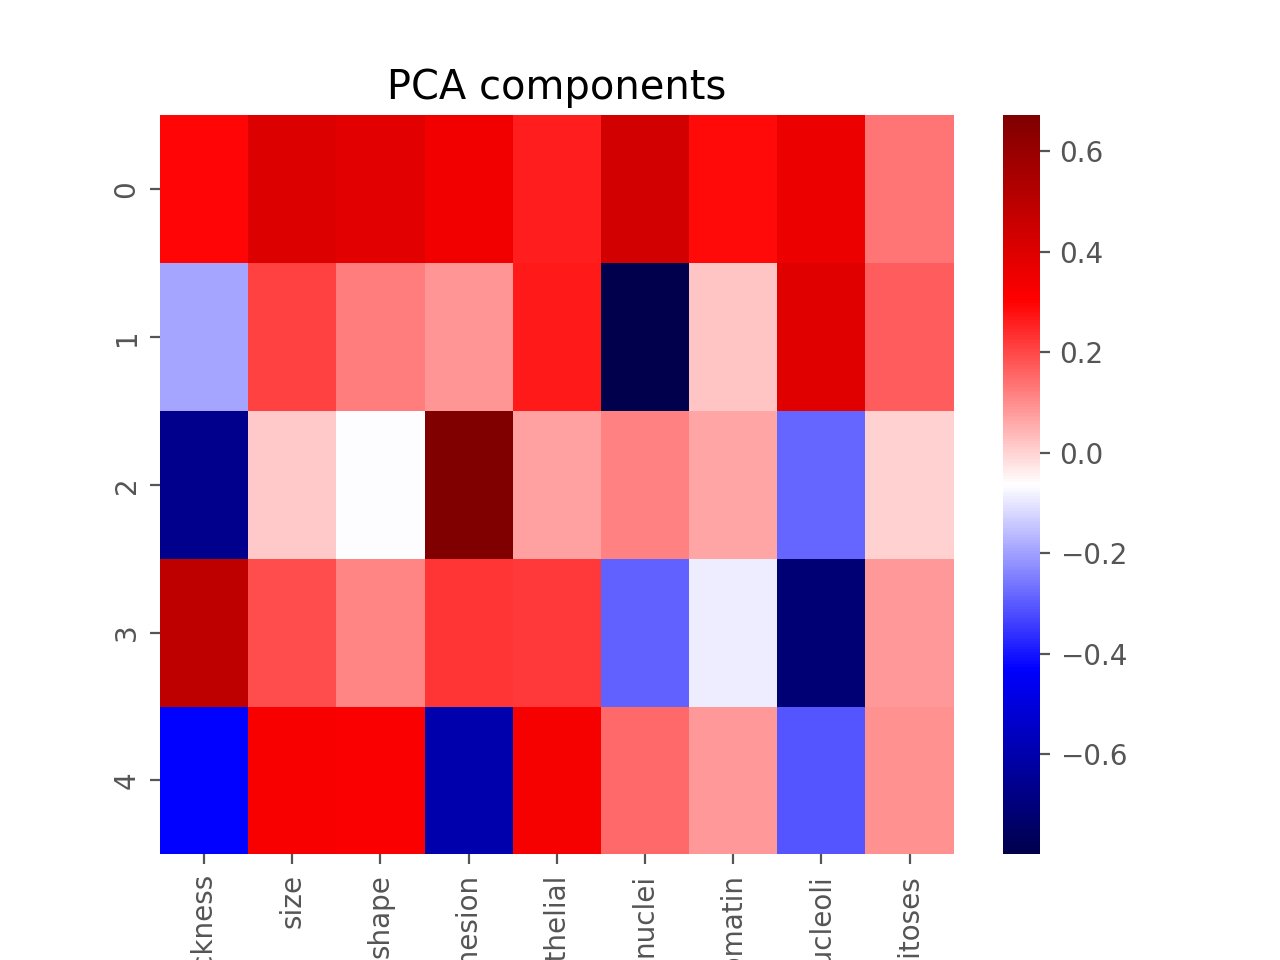

In [27]:
# plotting the inportance of pca components
cols = ['thickness', 'size', 'shape', 'adhesion', 'epithelial', 'nuclei', 'chromatin', 'nucleoli', 'mitoses']
map = pd.DataFrame(pca_components, columns=cols)
plt.figure()
plt.title('PCA components')
sn.heatmap(map, cmap='seismic')
plt.show()

<IPython.core.display.Javascript object>


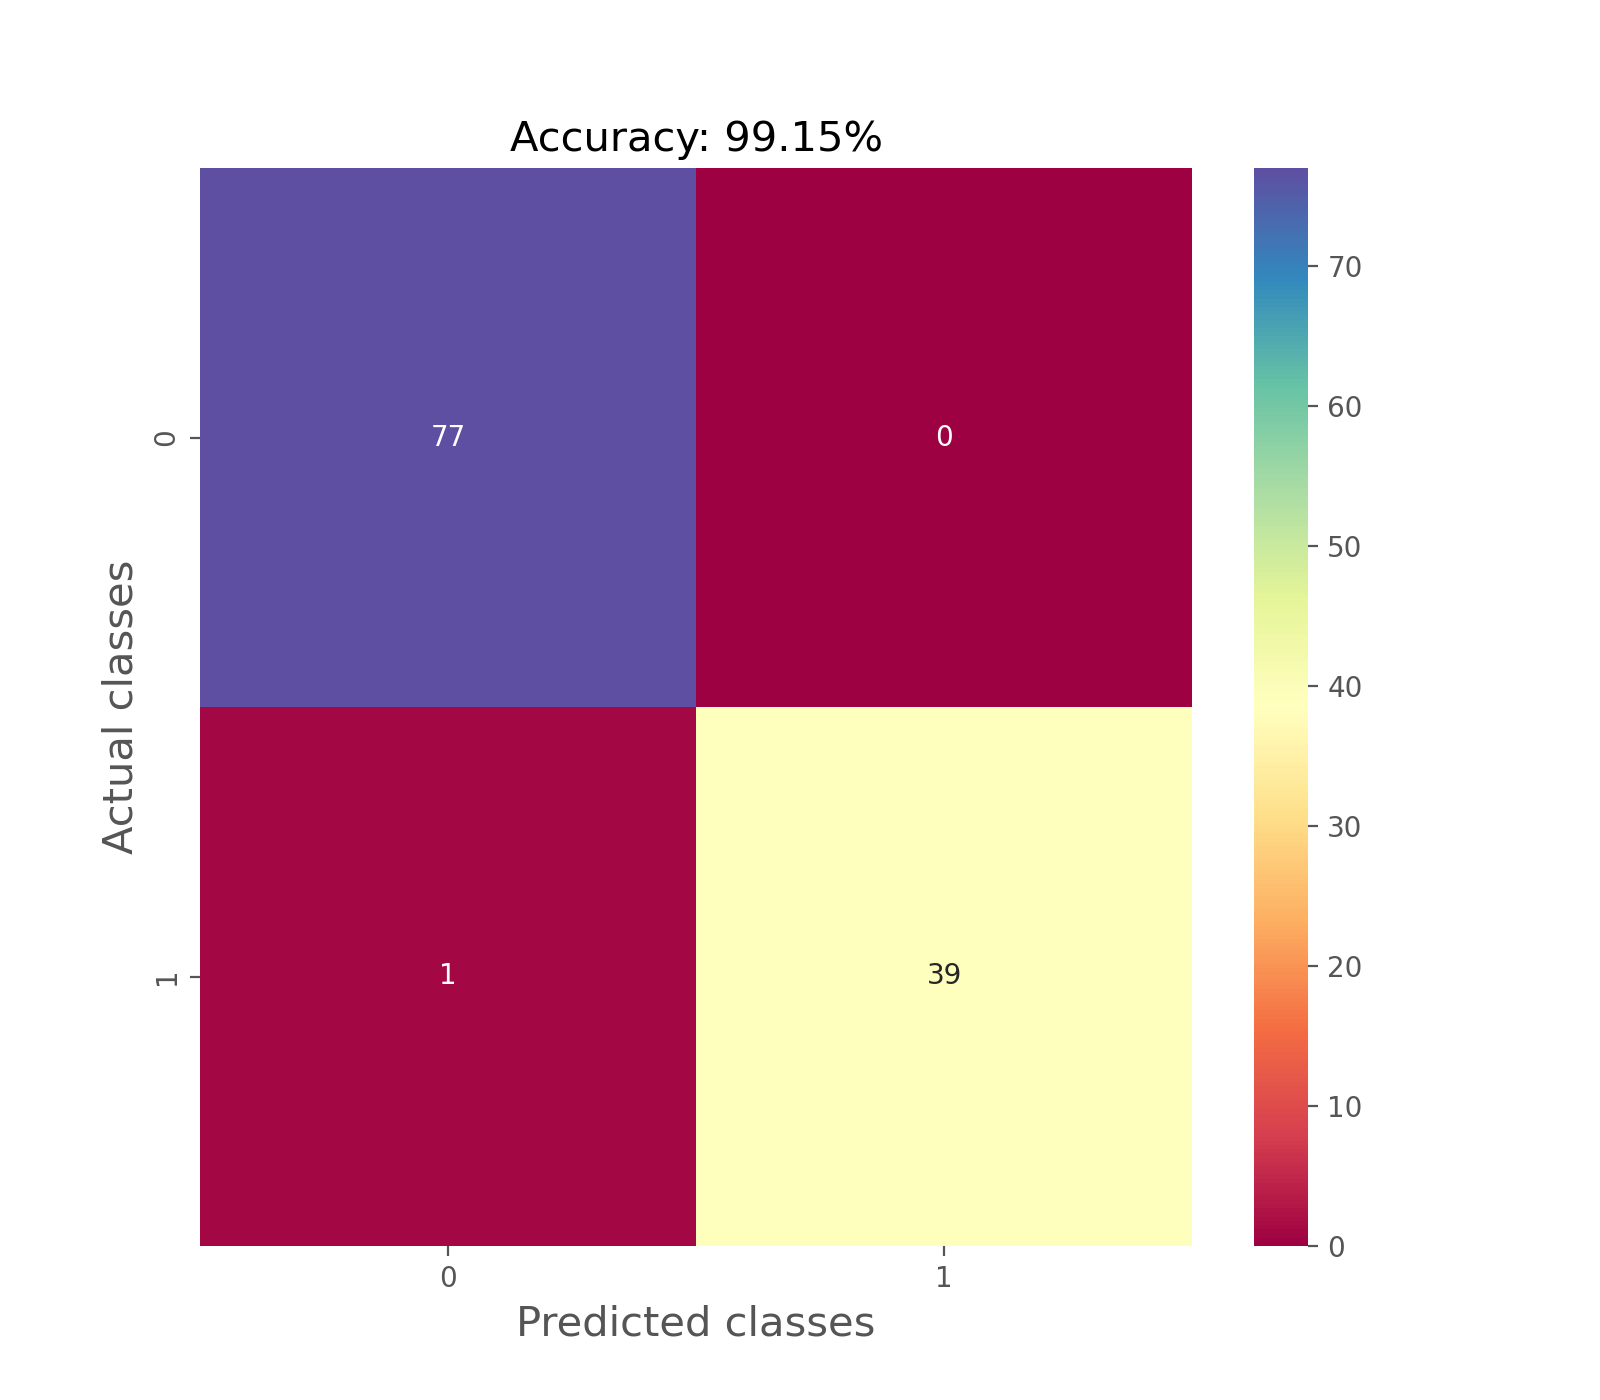

In [28]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 7))
sn.heatmap(cm, annot=True, cmap=plt.cm.Spectral)
plt.ylabel('Actual classes', size=15)
plt.xlabel('Predicted classes', size=15)
plt.title(f'Accuracy: {accuracy*100:.2f}%', size=15)
plt.show()

In [29]:
print('\n Classification report:\n\n', metrics.classification_report(y_test, y_pred))


 Classification report:

               precision    recall  f1-score   support

           2       0.99      1.00      0.99        77
           4       1.00      0.97      0.99        40

    accuracy                           0.99       117
   macro avg       0.99      0.99      0.99       117
weighted avg       0.99      0.99      0.99       117

